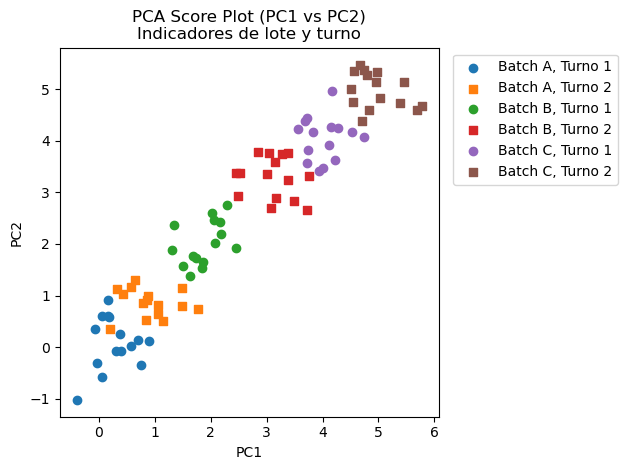

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Simulación de puntuaciones PCA para 3 lotes y 2 turnos
np.random.seed(0)
n_per_group = 15
batches = ['Batch A', 'Batch B', 'Batch C']
shifts = ['Turno 1', 'Turno 2']
data = []

for i, batch in enumerate(batches):
    for j, shift in enumerate(shifts):
        center = i * 2 + j  # centros separados en el espacio PC
        pc1 = np.random.normal(center, 0.4, n_per_group)
        pc2 = np.random.normal(center, 0.4, n_per_group)
        for x1, x2 in zip(pc1, pc2):
            data.append((x1, x2, batch, shift))

data = np.array(data, dtype=object)

# Mapeo de marcadores por turno
marker_map = {'Turno 1': 'o', 'Turno 2': 's'}

# Gráfico
plt.figure()
for batch in batches:
    for shift in shifts:
        mask = (data[:, 2] == batch) & (data[:, 3] == shift)
        plt.scatter(
            data[mask, 0], data[mask, 1],
            marker=marker_map[shift],
            label=f"{batch}, {shift}"
        )
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PCA Score Plot (PC1 vs PC2)\nIndicadores de lote y turno')
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left')
plt.tight_layout()
plt.show()



In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from tabulate import tabulate
import seaborn as sns
import numpy as np

In [3]:
#Cargar datos
df = pd.read_csv('../datos/dataset_completo.csv', parse_dates=['fecha'])

Variables a graficar: ['abv', 'reposo3_min', 'ebullicion_temp', 'ebullicion_minutos', 'primer_mosto_extracto', 'paila_llena_extracto', 'pH_1', 'ultima_agua_extracto']


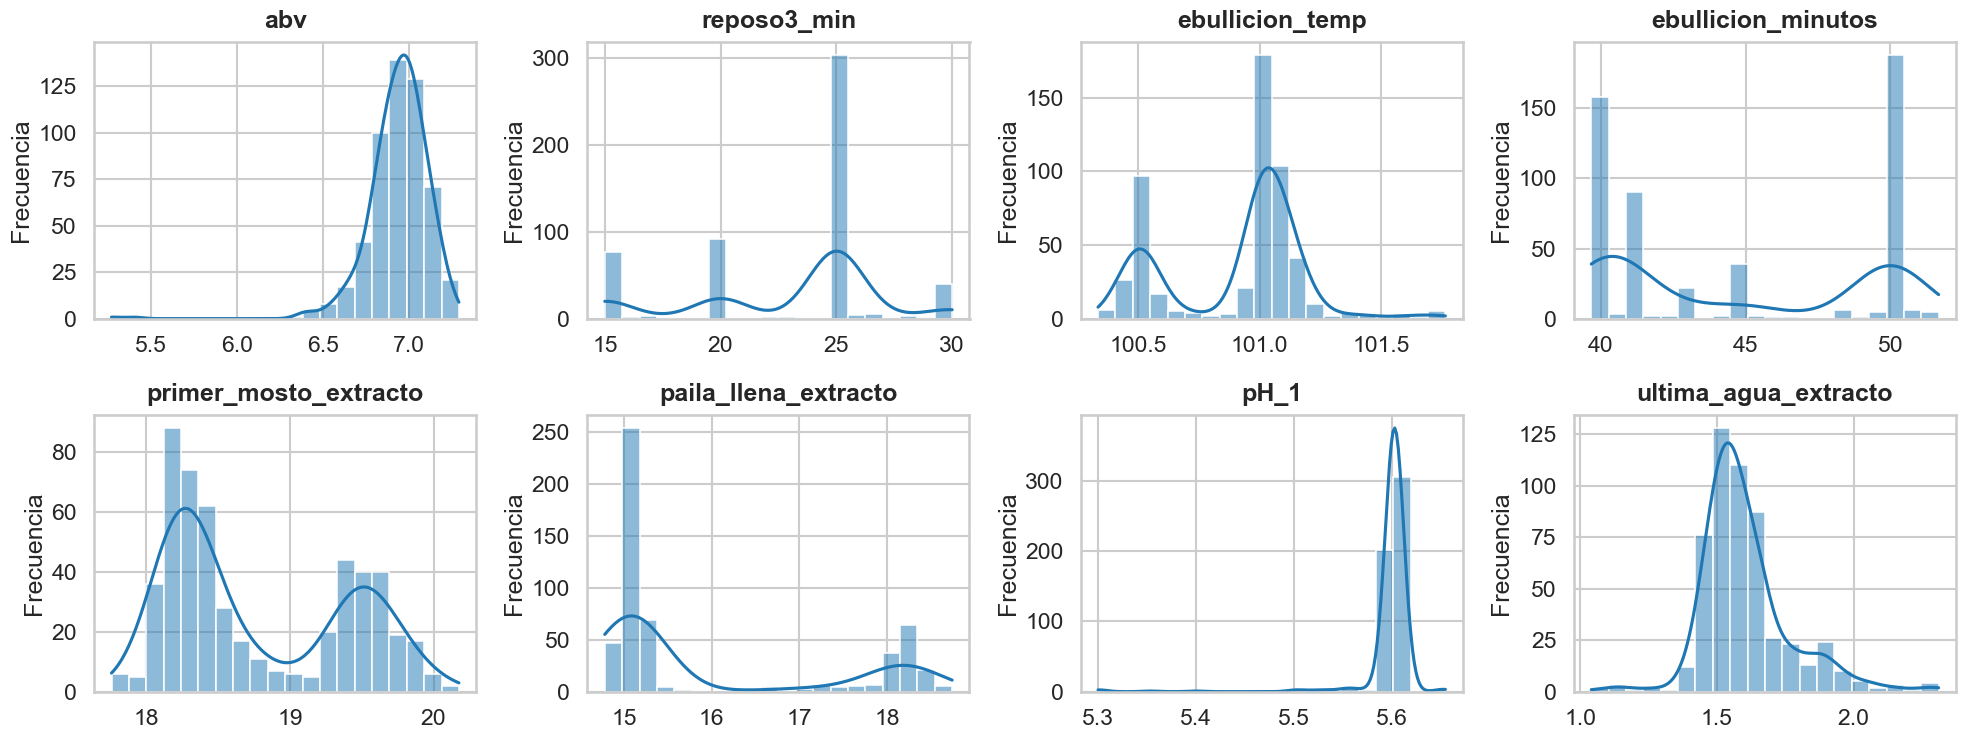

In [8]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Gráficos de distribución de datos, con opción de listar columnas a graficar
def plot_all_histograms(df, bins=30, cols=3, columns=None):
    """
    Plotea histogramas de distribución para un conjunto de variables.
    
    Parámetros:
    - df        : pandas.DataFrame con los datos.
    - bins      : número de bins para los histogramas.
    - cols      : número de columnas en la grilla de subplots.
    - columns   : lista de nombres de columnas a graficar. Si es None, usa todas las numéricas.
    """
    # Determinar qué columnas graficar
    if columns is None:
        vars_to_plot = df.select_dtypes(include='number').columns.tolist()
    else:
        # Filtrar sólo las que existan en el dataframe
        vars_to_plot = [c for c in columns if c in df.columns]
        if len(vars_to_plot) == 0:
            raise ValueError("Ninguna de las columnas solicitadas existe en el DataFrame.")
    
    # Mostrar la lista de variables seleccionadas
    print("Variables a graficar:", vars_to_plot)
    
    n_vars = len(vars_to_plot)
    rows = int(np.ceil(n_vars / cols))
    
    sns.set_style('whitegrid')
    sns.set_context('talk')
    
    # Crear figura y ejes
    fig, axes = plt.subplots(rows, cols, figsize=(cols * 5, rows * 4),
                             sharex=False, sharey=False)
    axes = axes.flatten()
    
    # Dibujar cada histograma
    for ax, col in zip(axes, vars_to_plot):
        sns.histplot(
            df[col],
            bins=bins,
            kde=True,
            ax=ax
        )
        ax.set_title(col, fontweight='bold', pad=10)
        ax.set_xlabel('')
        ax.set_ylabel('Frecuencia')
    
    # Eliminar ejes sobrantes
    for ax in axes[n_vars:]:
        fig.delaxes(ax)
    
    fig.suptitle('',
                 fontsize=18, fontweight='bold', y=1.02)
    plt.tight_layout()
    plt.show()


# Ejemplo de uso:
# - Para todas las columnas numéricas:
#     plot_all_histograms(df, bins=25, cols=4)
# - Para un subconjunto de variables:
plot_all_histograms(df, bins=20, cols=4, columns=['abv','reposo3_min','ebullicion_temp','ebullicion_minutos','primer_mosto_extracto','paila_llena_extracto','pH_1','ultima_agua_extracto'])
